LAPORAN INDIVIDU BIG DATA




•	Nama: Ilhamdi Taufik
•	NoBP: 22101152630413
•	Institusi: Teknik Informatika – Fakultas Ilmu Komputer – Universitas Putra Indonesia YPTK Padang.



Latar Belakang
Kesehatan adalah hal yang berharga. Maka kebutuhan akan akses Kesehatan adalah mutlak diperlukan untuk menjamin keberlangsungan dan kesejahteraan Masyarakat. Di Masyarakat, ada beberapa penyakit yang berimbas luar biasa kepada penderita, salah satunya adalah penyakit kanker payudara.

Penyakit kanker payudara jika tidak ditangani dengan segera dapat menyebabkan kematian. Oleh karena itu, Pemerintah berupaya menekan angka kematian penderita kanker payudara. Data-data pasien dan kondisi Kesehatan pasien mulai digencarkan untuk direkam oleh Pemerintah, kemudian dataset itu digunakan menjadi bahan untuk model prediksi yang bisa membantu memprediksi dan mengklasifikasi Kesehatan pasien kanker payudara.

Diantara alternatif Solusi yang dikembangkan adalah metode Data Science yang menerapkan sebuah framework yang telah dipergunakan secara luas di dunia industry yaitu CRISP-DM framework. Framework ini selanjutnya diuraikan menjadi sebuah 11 urutan Langkah-langkah antara lain: memahami tujuan bisnis, memahami tujuan teknis data science, memahami dan melakukan proses awal data, membuah scenario pemodelan, membuat model yang handal, mengevaluasi pemodelan, dan mereview proyek data science. Solusi tersebut digunakan untuk mengidentifikasi factor-faktor yang berkontribusi terhadap Kesehatan pasien kanker payudara. Hasil prediksi tersebut selanjutkan digunakan oleh pasien dan pemerintah dalam meningkatkan harapan hidup pasien kanker payudara.

Sumber data utama untuk keperluan pengembangan model prediksi ini adalah hasil test klinis terhadap pasien rumah sakit sebagai responden menggunakan Teknik proporsional random sampling. Pengumpulan data melalui data rekap medis menghasilkan data berisi atribut: Sample_code_number,  Clump_thickness,  Uniformity_of_cell_size,  Uniformity_of_cell_shape,  Marginal_adhesion,  Single_epithelial_cell_size,  Bare_nuclei,  Bland_chromatin,  Normal_nucleoli,  Mitoses,  Class.

Disini Class (2 = benign, 4 = malignant) merupakan variable dependent nya (label yang dicari).



Tujuan Laporan

Tujuan pemanfaatan metode Data Science yang utama didalam kasis ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk:

•	Mengidentifikasi variable kunci yang mempengaruhi harapan hidup pasien kanker payudara,
•	dan memprediksi harapan hidup pasien kanker payudara.

Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihhak rumah sakit dan Pemerintah untuk mengatasi salah satu masalah penting dibidang Kesehatan tersebut.


Terkait Dataset

Sumber Data:
https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
Jumlah Sampel Data: 699 records dengan 99 atributes

Atribut untuk memprediksi harapan hidup pasien kanker payudara:

1.	Sample code number: id number
2.	Clump Thickness: 1 – 10
3.	Uniformity of Cell Size: 1 – 10
4.	Uniformity of Cell Shape: 1 – 10
5.	Marginal Adhesion: 1 – 10
6.	Single Epithelial Cell Size: 1 – 10
7.	Bare Nuclei: 1 – 10
8.	Bland Chromatin: 1 – 10
9.	Normal Nucleoli: 1 – 10
10.	Mitoses: 1 – 10

Fitur Target

11.	Class: (2 for benign, 4 for malignant)



UNIT 1


**UNIT 1**

In [129]:
folder_name = "/content/drive/My Drive/Colab Notebooks/BIG_DATA/01_Adult_Klasifikasi"

In [130]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [131]:
# Mengimpor Library yang Diperlukan untuk Analisis Data dan Model Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import joblib

pd.set_option('display.max_columns', None)

In [132]:
# bisa juga dari folder google drive

column_names = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
                'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei',
                'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'class'];

df =pd.read_csv(f'{folder_name}/breast-cancer-wisconsin.data', sep=',',names=column_names, skipinitialspace=True, na_values="?")

# Tampilkan beberapa baris pertama dan informasi dataset
df.head(5)

Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  class  
0          1.0                3                1        1      2  
1         10.0                3                2        1      2  
2          2.0                3                1        1      2  
3          4.0                3                7        1      2  
4          1.0                3                1        1      2

In [133]:
df.set_index('Sample_code_number', inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


In [135]:
df.head()

Clump_thickness  Uniformity_of_cell_size  \
Sample_code_number                                             
1000025                           5                        1   
1002945                           5                        4   
1015425                           3                        1   
1016277                           6                        8   
1017023                           4                        1   

                    Uniformity_of_cell_shape  Marginal_adhesion  \
Sample_code_number                                                
1000025                                    1                  1   
1002945                                    4                  5   
1015425                                    1                  1   
1016277                                    8                  1   
1017023                                    1                  3   

                    Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  \
Sample_code_number                                                              
1000025                                       2          1.0                3   
1002945                                       7         10.0                3   
1015425                                       2          2.0                3   
1016277                                       3          4.0                3   
1017023                                       2          1.0                3   

                    Normal_nucleoli  Mitoses  class  
Sample_code_number                                   
1000025                           1        1      2  
1002945                           2        1      2  
1015425                           1        1      2  
1016277                           7        1      2  
1017023                           1        1      2

In [136]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
class                           0
dtype: int64


In [137]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
Clump_thickness                0.000000
Uniformity_of_cell_size        0.000000
Uniformity_of_cell_shape       0.000000
Marginal_adhesion              0.000000
Single_epithelial_cell_size    0.000000
Bare_nuclei                    2.288984
Bland_chromatin                0.000000
Normal_nucleoli                0.000000
Mitoses                        0.000000
class                          0.000000
dtype: float64


In [138]:
# Analisis Statistik Deskriptif

# Statistik deskriptif untuk variabel numerik
df.describe()

Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count         699.000000                   699.000000   683.000000   
mean            2.806867                     3.216023     3.544656   
std             2.855379                     2.214300     3.643857   
min             1.000000                     1.000000     1.000000   
25%             1.000000                     2.000000     1.000000   
50%             1.000000                     2.000000     1.000000   
75%             4.000000                     4.000000     6.000000   
max            10.000000                    10.000000    10.000000   

       Bland_chromatin  Normal_nucleoli     Mitoses       class  
count       699.000000       699.000000  699.000000  699.000000  
mean          3.437768         2.866953    1.589413    2.689557  
std           2.438364         3.053634    1.715078    0.951273  
min           1.000000         1.000000    1.000000    2.000000  
25%           2.000000         1.000000    1.000000    2.000000  
50%           3.000000         1.000000    1.000000    2.000000  
75%           5.000000         4.000000    1.000000    4.000000  
max          10.000000        10.000000   10.000000    4.000000

In [139]:
# Statistik deskriptif untuk variabel kategorikal
df.describe(include=['float'])

Bare_nuclei
count   683.000000
mean      3.544656
std       3.643857
min       1.000000
25%       1.000000
50%       1.000000
75%       6.000000
max      10.000000

In [140]:
# Distribusi target variable
df['class'].value_counts(normalize=True)

class
2    0.655222
4    0.344778
Name: proportion, dtype: float64

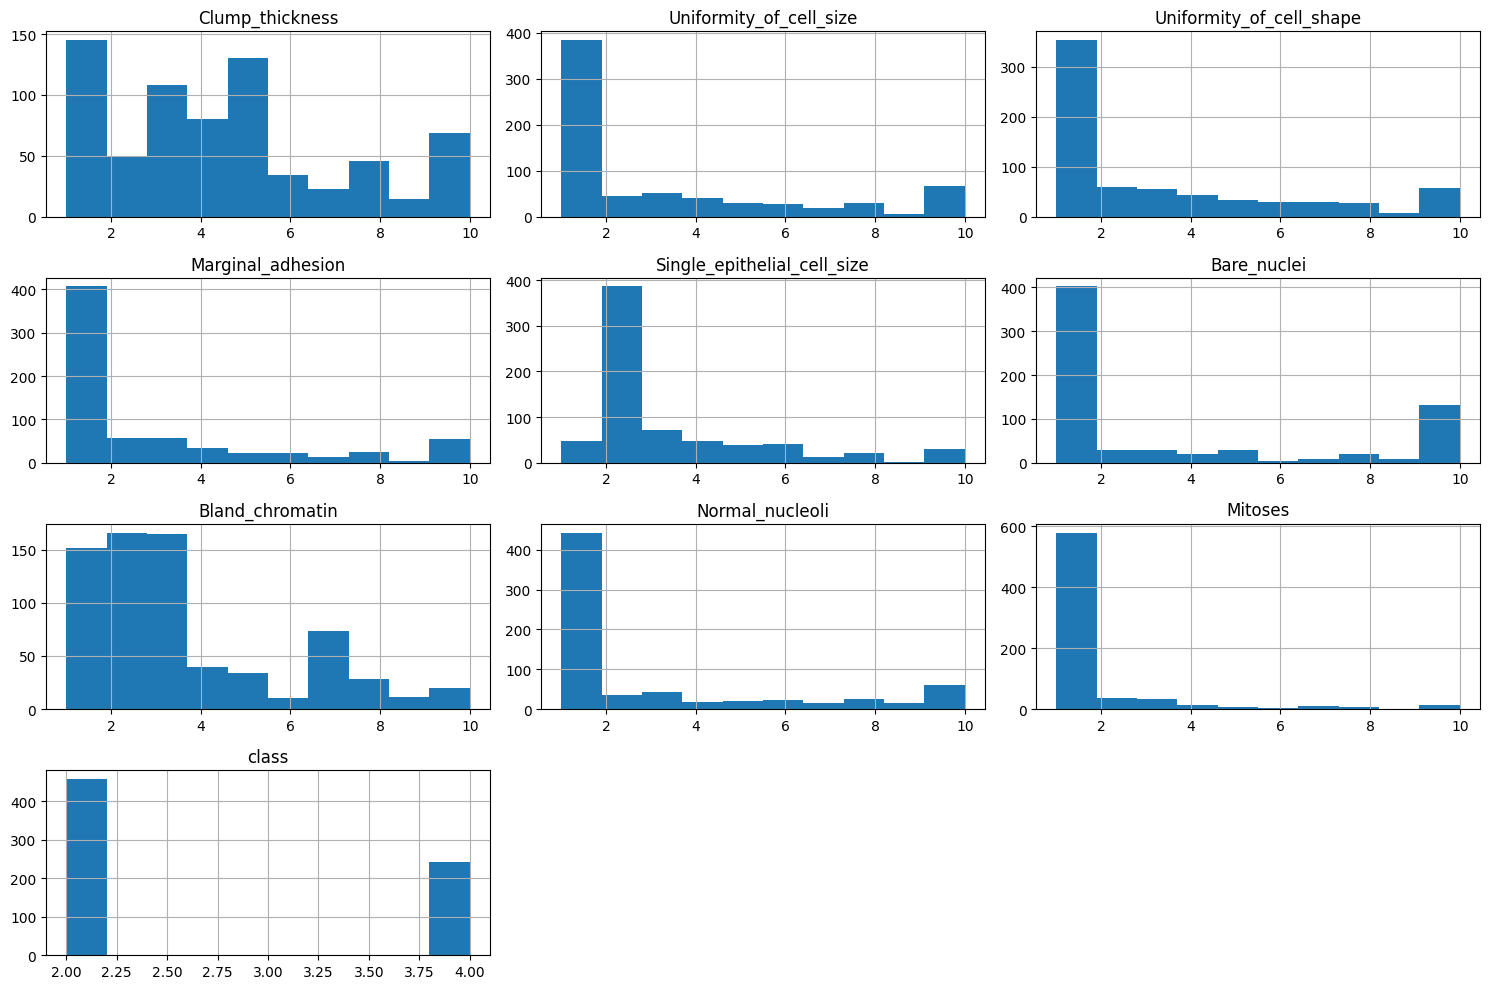

In [141]:
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

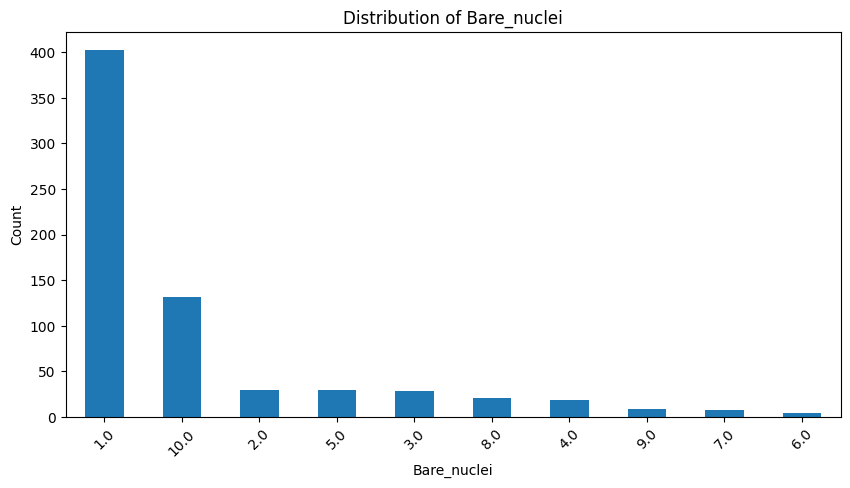

In [142]:
# Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['float']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

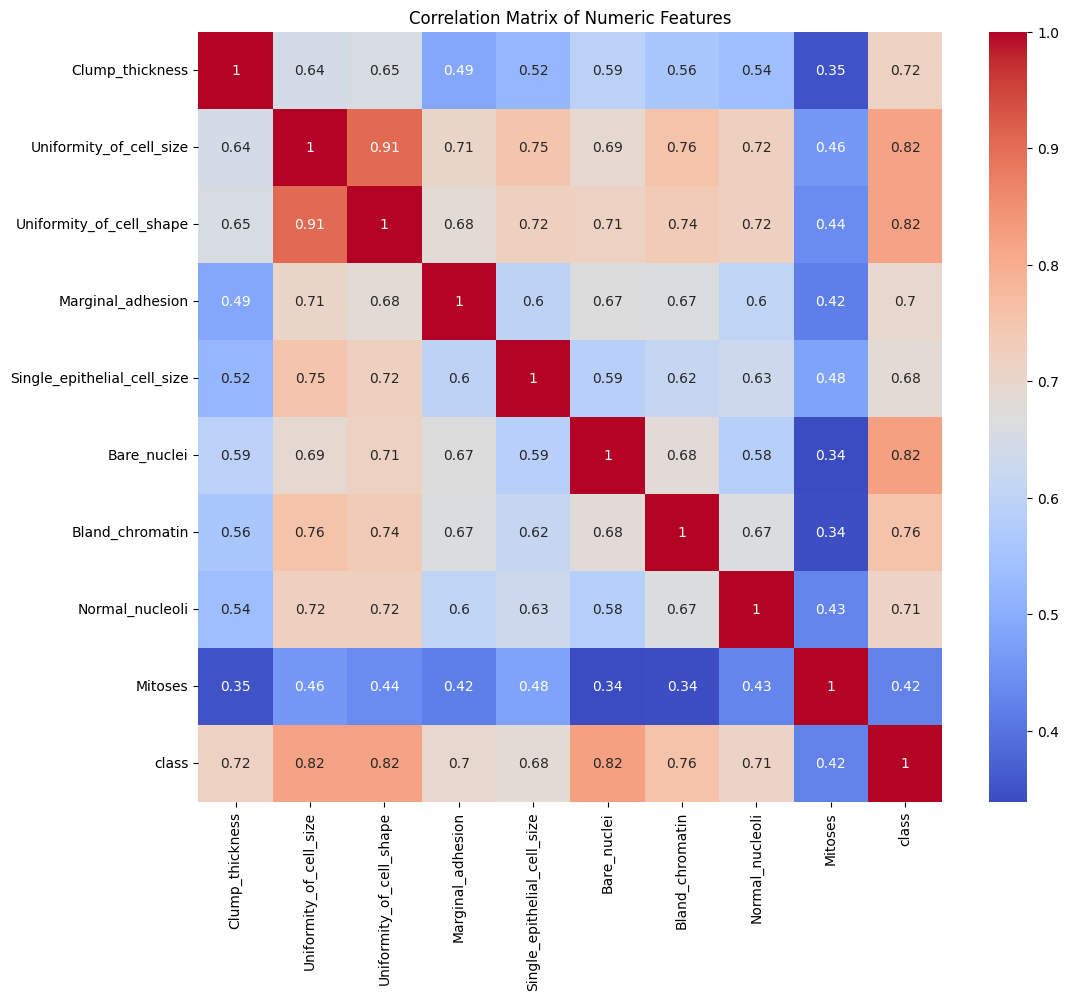

In [143]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

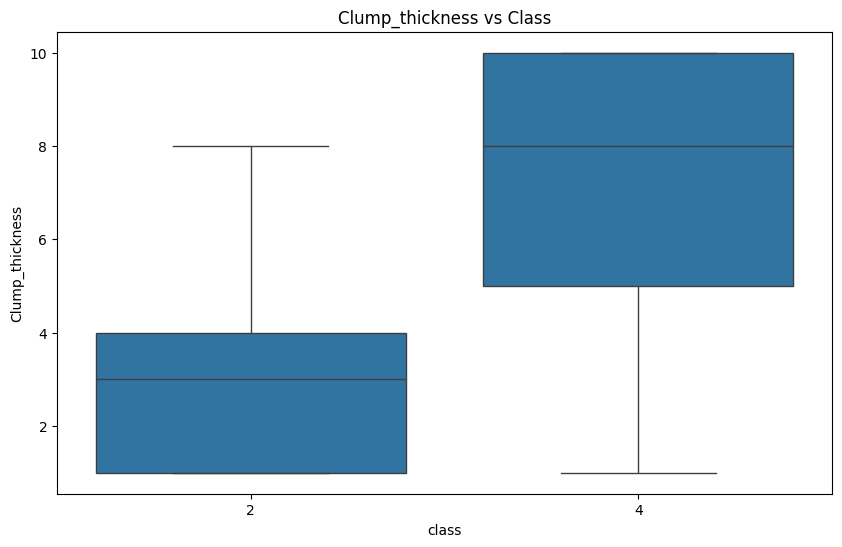

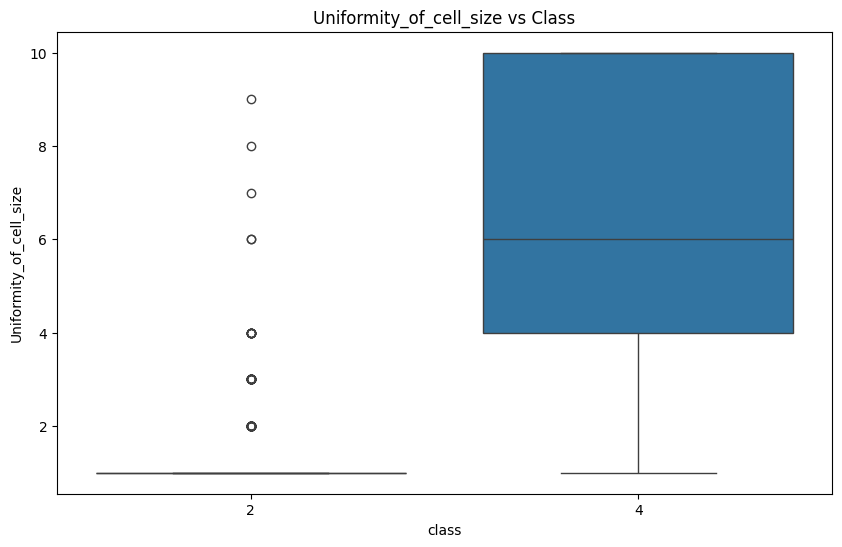

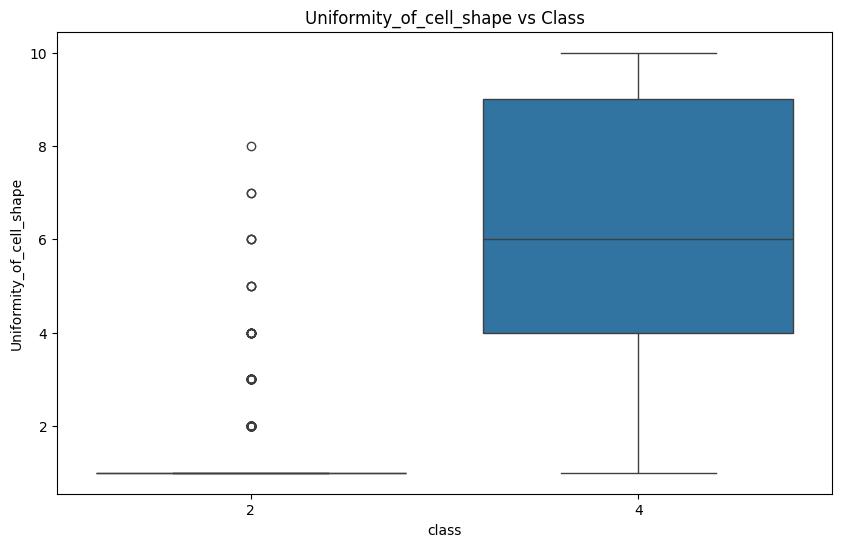

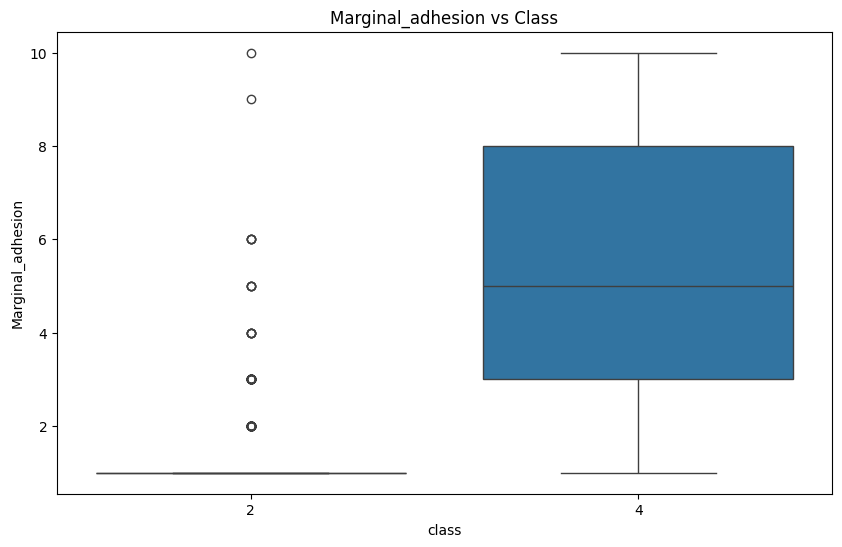

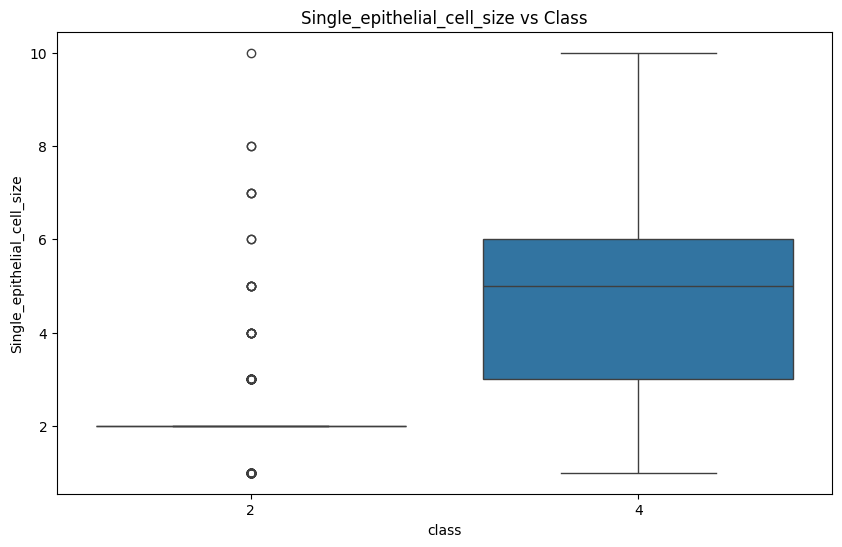

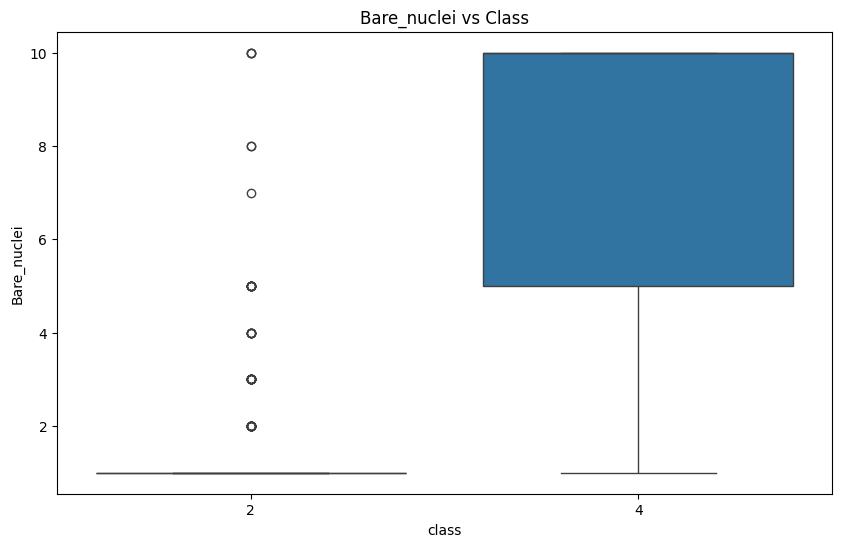

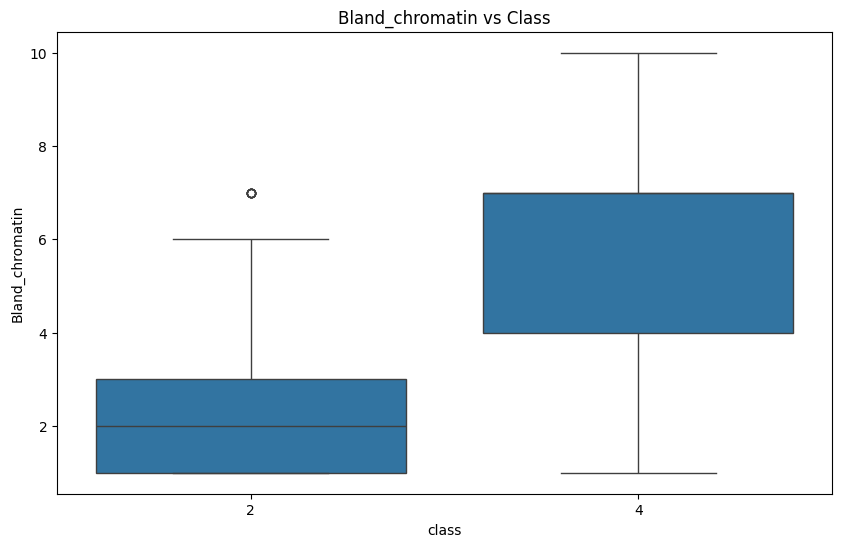

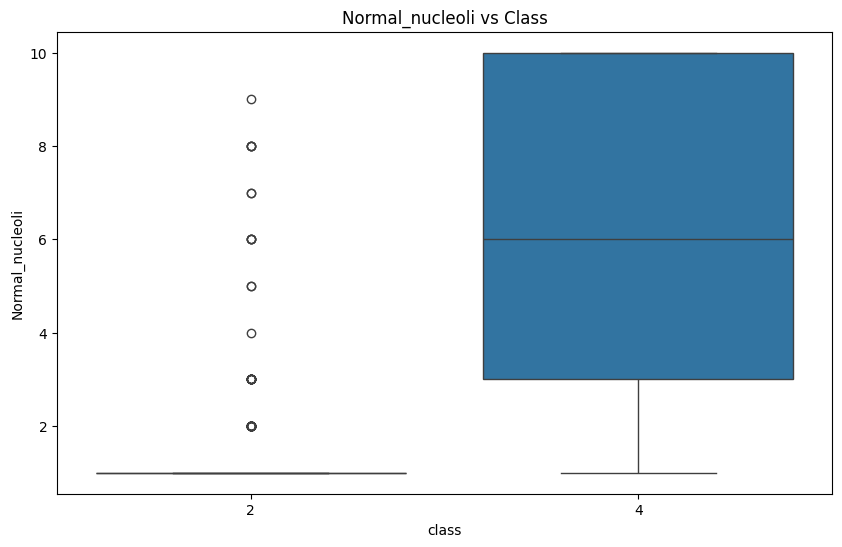

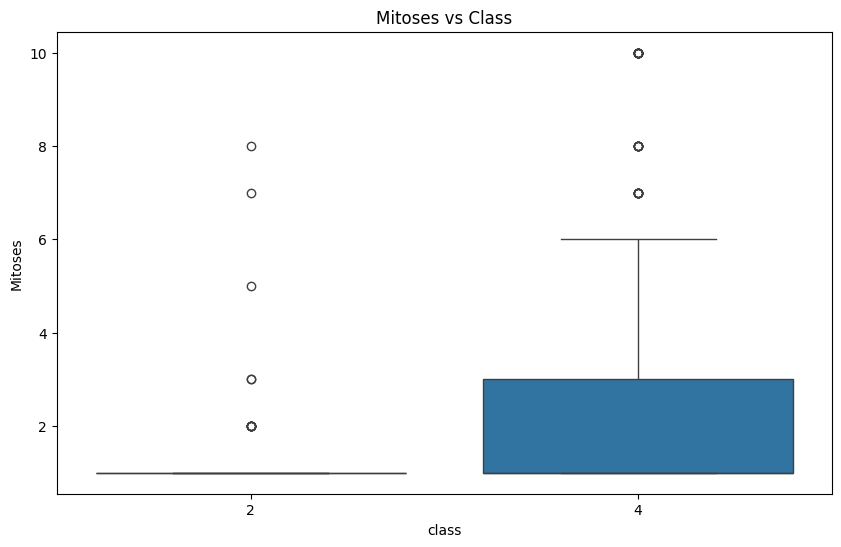

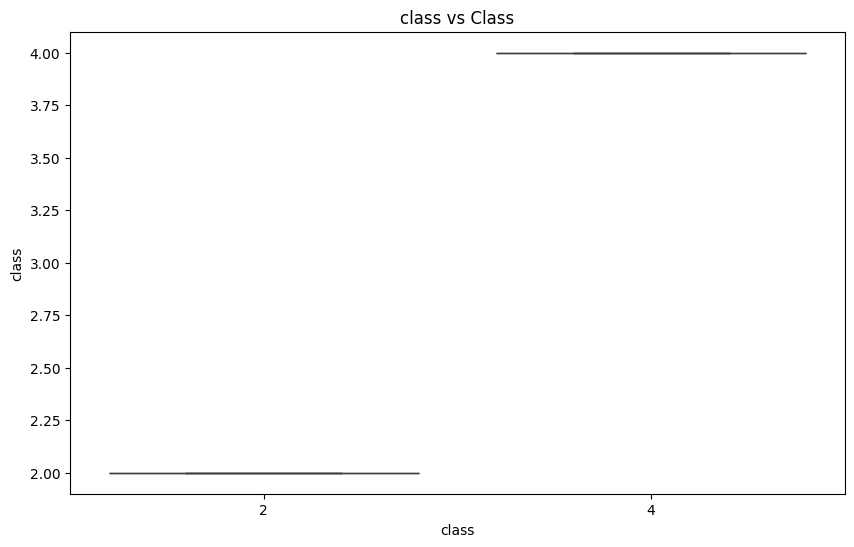

In [144]:
# Boxplot numerik vs target
# Reset index to default before plotting
df_reset = df.reset_index()
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='class', y=feature, data=df_reset)  # Use the reset DataFrame
    plt.title(f'{feature} vs Class')
    plt.show()

<Figure size 1800x600 with 0 Axes>

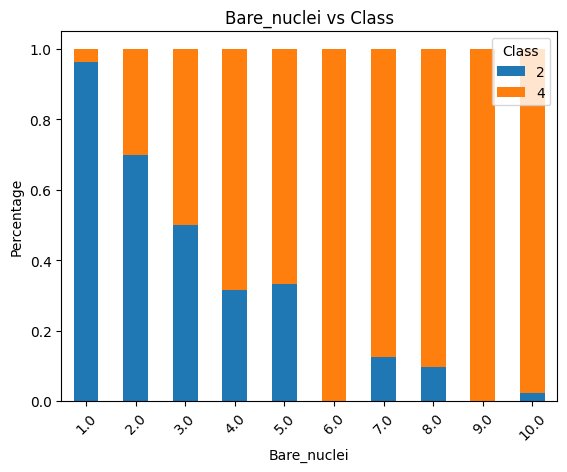

In [145]:
# Stacked bar plot kategorikal vs target
for feature in categorical_features:
    if feature != 'class':
        plt.figure(figsize=(18, 6))
        df_temp = df.groupby([feature, 'class']).size().unstack()
        df_temp_perc = df_temp.div(df_temp.sum(axis=1), axis=0)
        df_temp_perc.plot(kind='bar', stacked=True)
        plt.title(f'{feature} vs Class')
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.legend(title='Class', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()

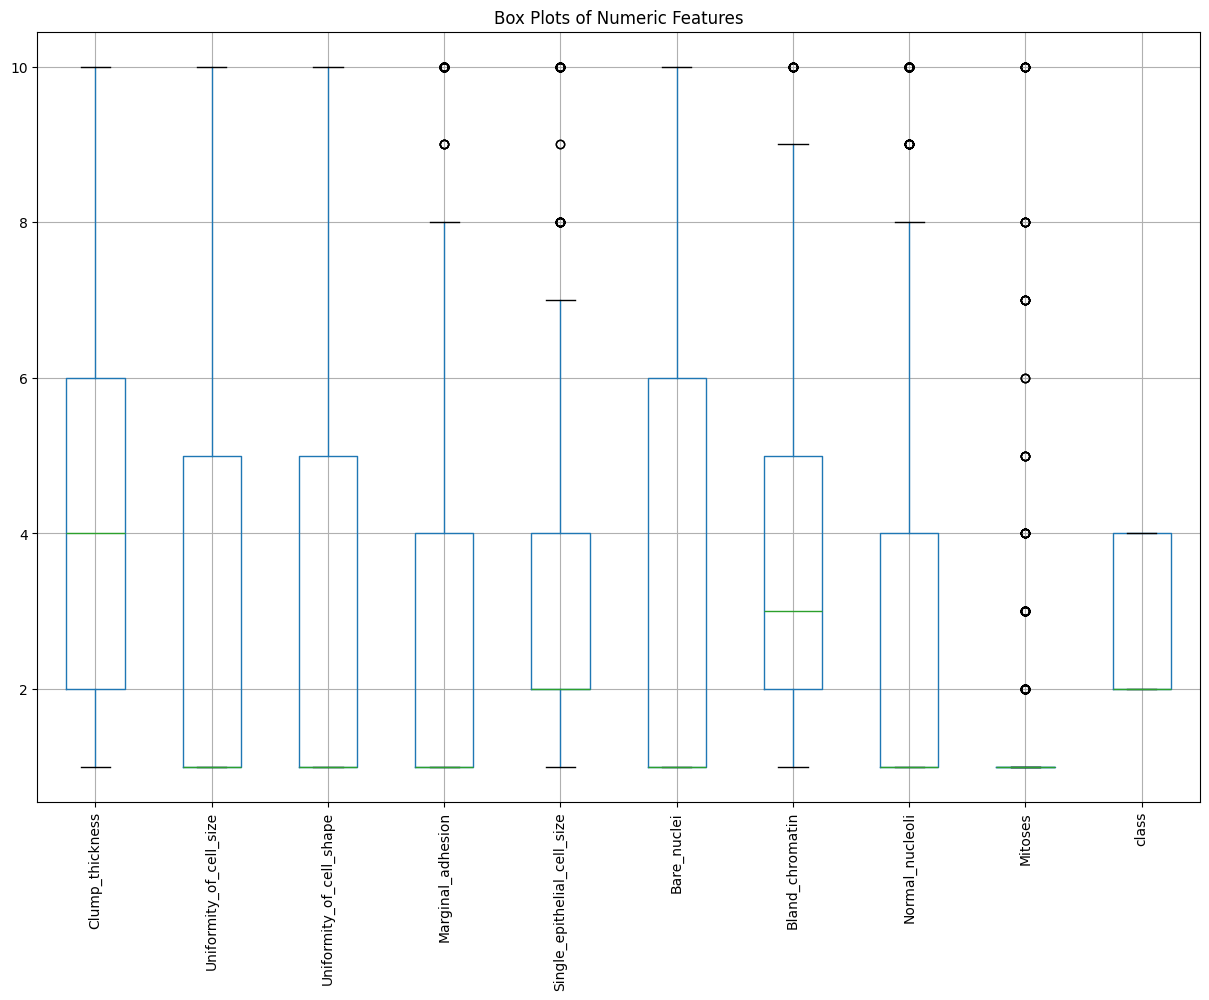

In [146]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

**MEMVALIDASI DATA**

In [147]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                             Total   Percent
Clump_thickness                  0  0.000000
Uniformity_of_cell_size          0  0.000000
Uniformity_of_cell_shape         0  0.000000
Marginal_adhesion                0  0.000000
Single_epithelial_cell_size      0  0.000000
Bare_nuclei                     16  2.288984
Bland_chromatin                  0  0.000000
Normal_nucleoli                  0  0.000000
Mitoses                          0  0.000000
class                            0  0.000000


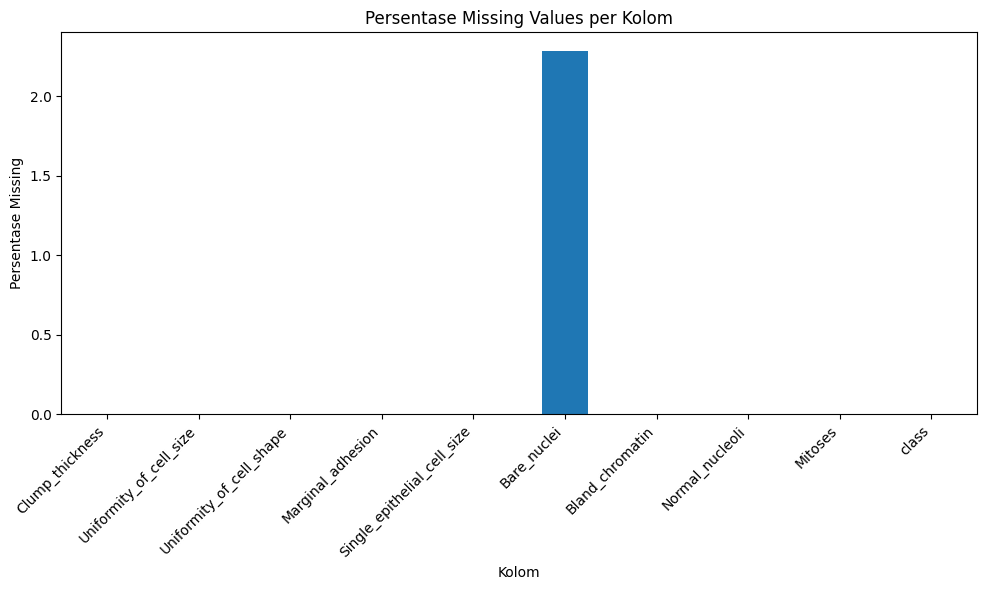

In [148]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [149]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 236

Contoh baris duplikat:
                    Clump_thickness  Uniformity_of_cell_size  \
Sample_code_number                                             
1000025                           5                        1   
1017023                           4                        1   
1035283                           1                        1   
1036172                           2                        1   
1048672                           4                        1   
1049815                           4                        1   
1050718                           6                        1   
1056784                           3                        1   
1059552                           1                        1   
1066979                           5                        1   

                    Uniformity_of_cell_shape  Marginal_adhesion  \
Sample_code_number                                                
1000025                                    1  

In [150]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
class                            int64
dtype: object

Nilai non-numerik dalam kolom Bare_nuclei:
[nan]


In [151]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Clump_thickness:
Min: 1, Max: 10

Range nilai untuk Uniformity_of_cell_size:
Min: 1, Max: 10

Range nilai untuk Uniformity_of_cell_shape:
Min: 1, Max: 10

Range nilai untuk Marginal_adhesion:
Min: 1, Max: 10

Range nilai untuk Single_epithelial_cell_size:
Min: 1, Max: 10

Range nilai untuk Bare_nuclei:
Min: 1.0, Max: 10.0

Range nilai untuk Bland_chromatin:
Min: 1, Max: 10

Range nilai untuk Normal_nucleoli:
Min: 1, Max: 10

Range nilai untuk Mitoses:
Min: 1, Max: 10

Range nilai untuk class:
Min: 2, Max: 4


In [152]:
# Contoh: Periksa konsistensi antara 'class' dan 'class'
bare_nuclei_mapping = df.groupby('class')['class'].mean().sort_values()
print("\nPemetaan rata-rata 'class_mapping' untuk setiap 'class':")
print(bare_nuclei_mapping)


Pemetaan rata-rata 'class_mapping' untuk setiap 'class':
class
2    2.0
4    4.0
Name: class, dtype: float64


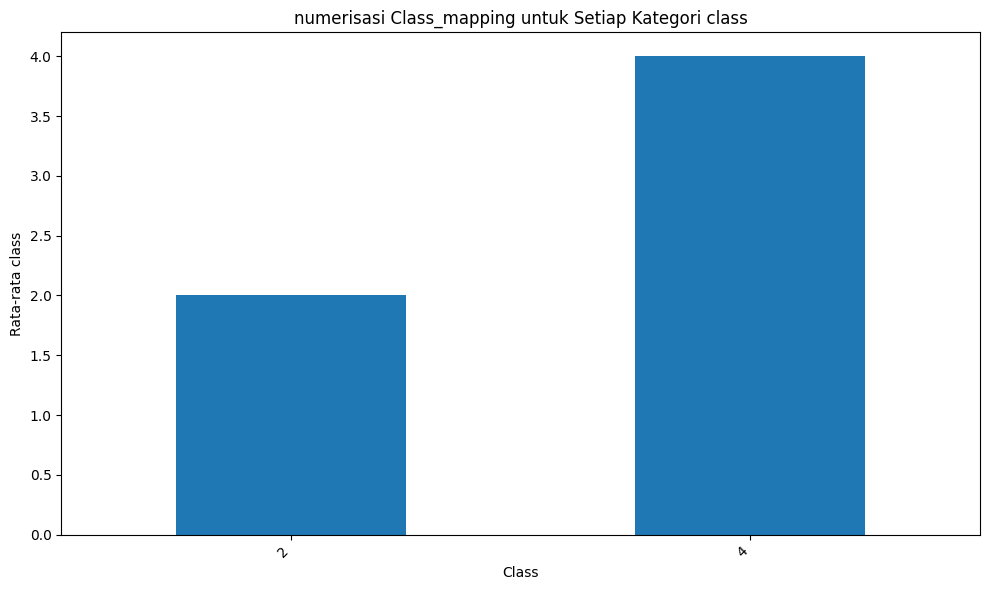

In [153]:
# Visualisasi konsistensi
plt.figure(figsize=(10, 6))
bare_nuclei_mapping.plot(kind='bar')
plt.title('numerisasi Class_mapping untuk Setiap Kategori class')
plt.xlabel('Class')
plt.ylabel('Rata-rata class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [154]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'float':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
class                           0
dtype: int64

Missing values setelah pembersihan:
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
class                          0
dtype: int64


/tmp/ipython-input-154-2456539400.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/tmp/ipython-input-154-2456539400.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

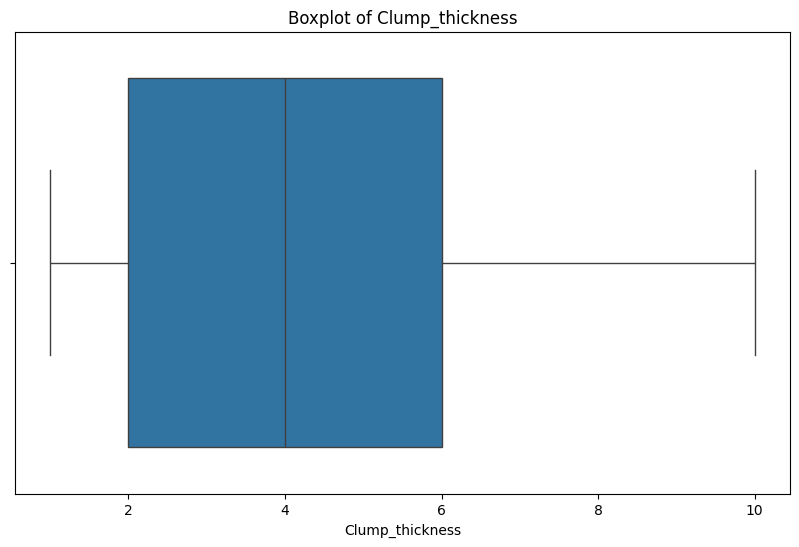

Outliers pada Clump_thickness sudah dihandel.


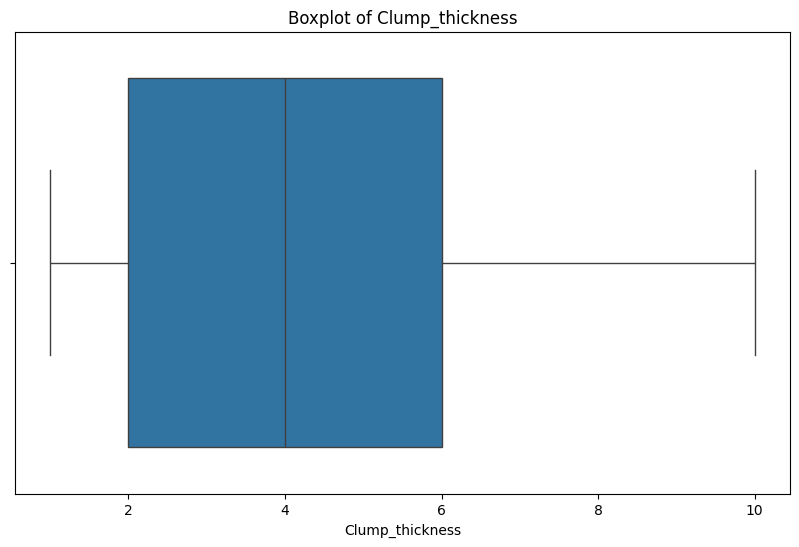

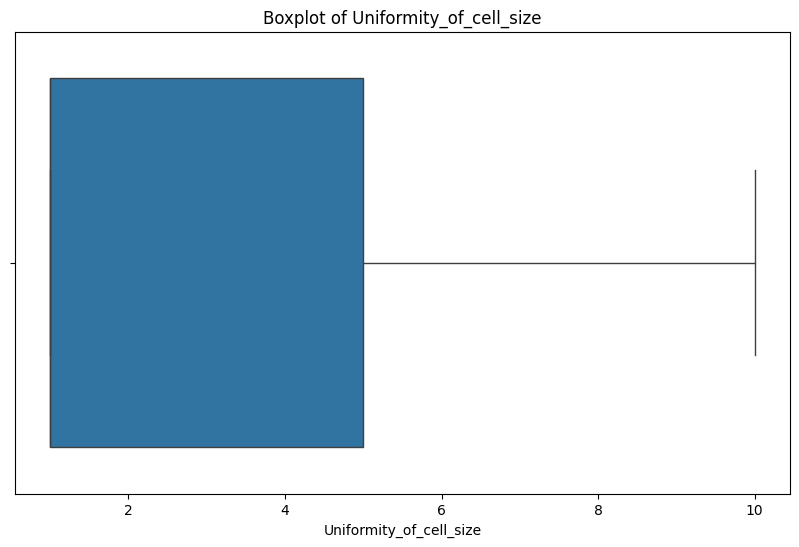

Outliers pada Uniformity_of_cell_size sudah dihandel.


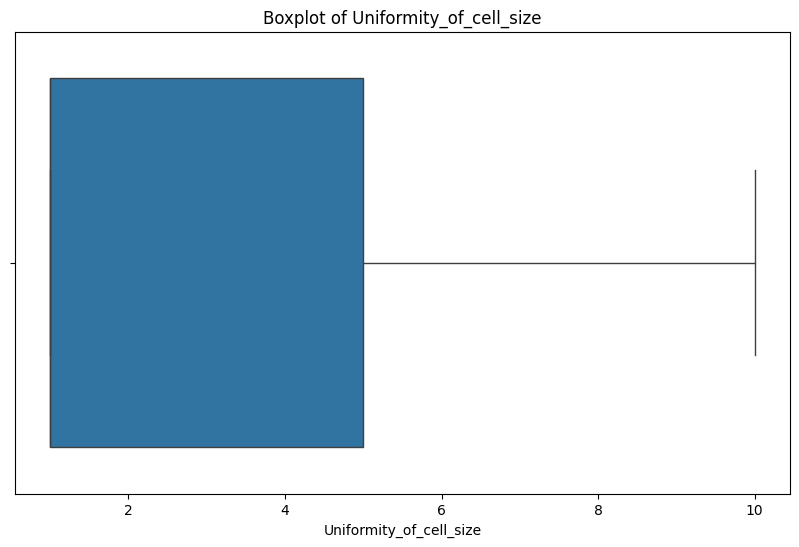

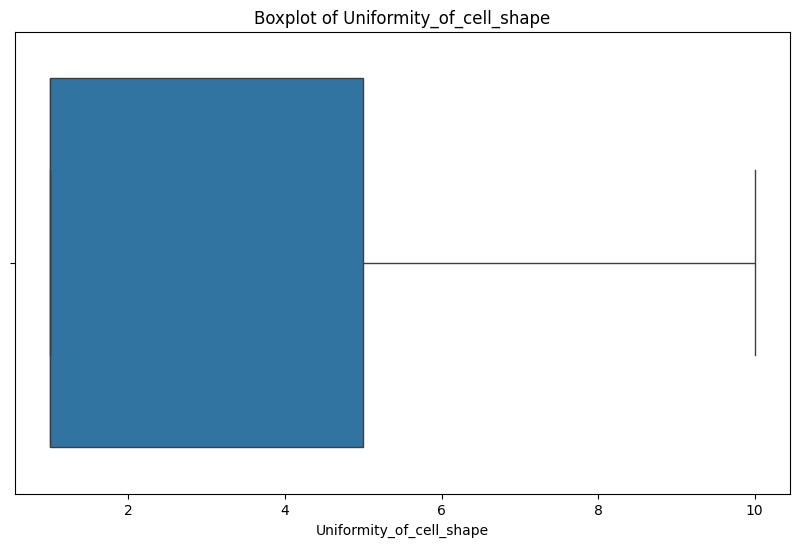

Outliers pada Uniformity_of_cell_shape sudah dihandel.


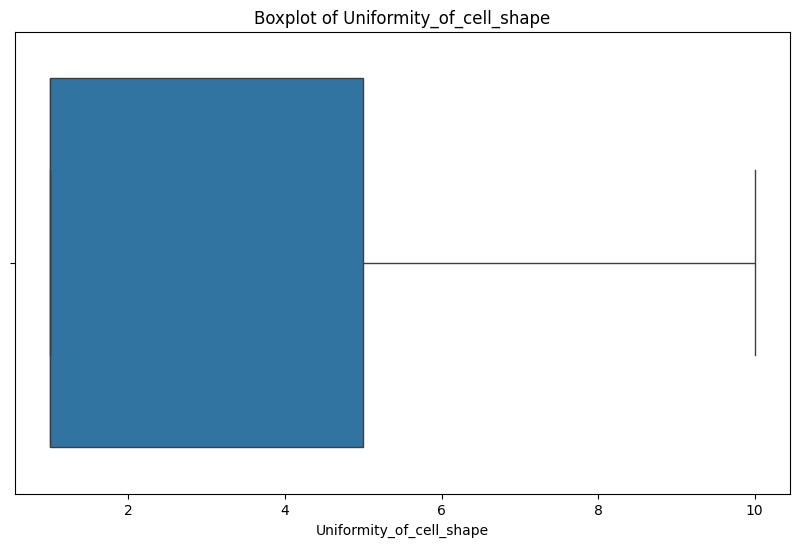

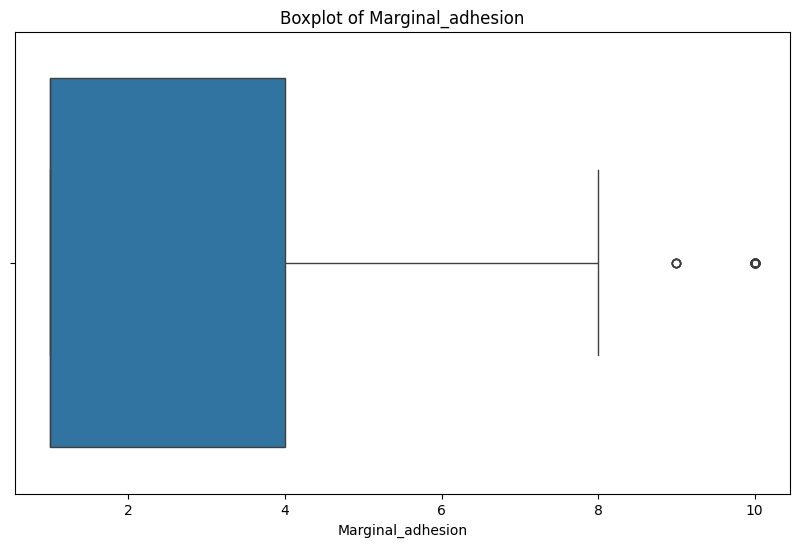

Outliers pada Marginal_adhesion sudah dihandel.


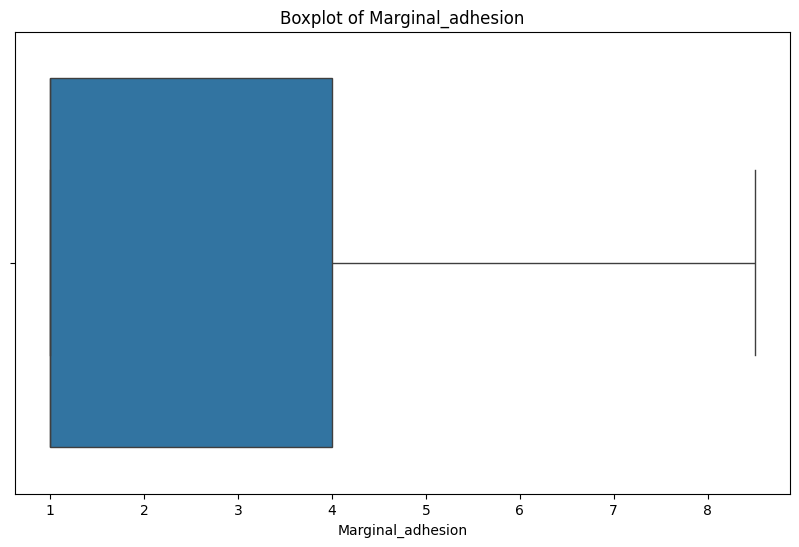

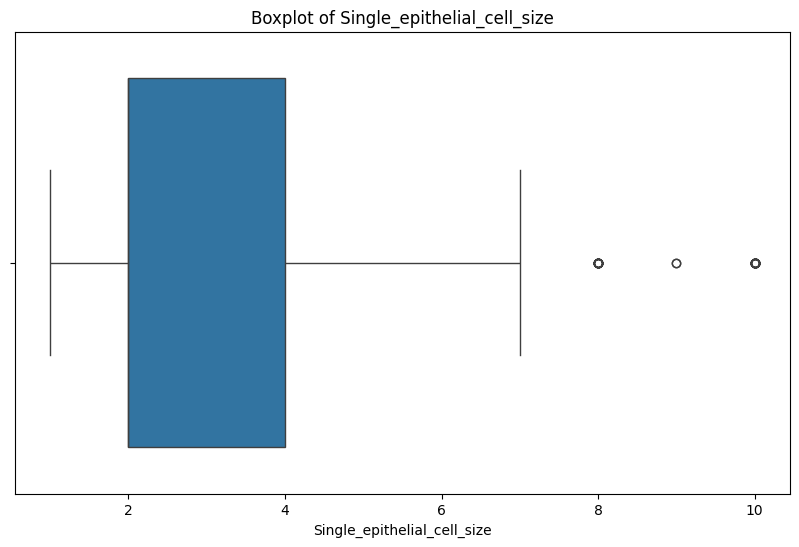

Outliers pada Single_epithelial_cell_size sudah dihandel.


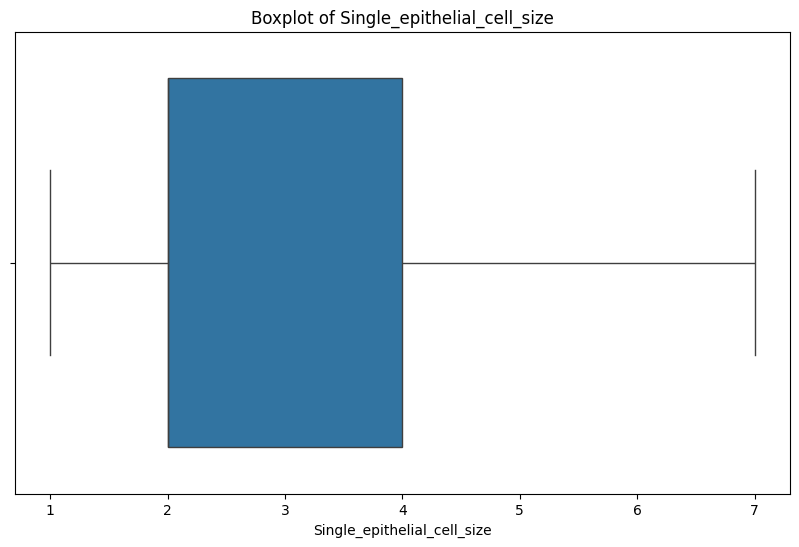

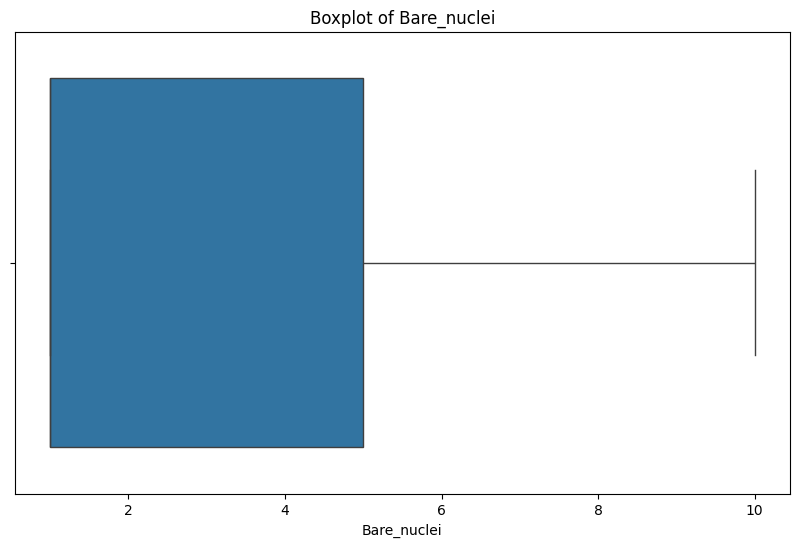

Outliers pada Bare_nuclei sudah dihandel.


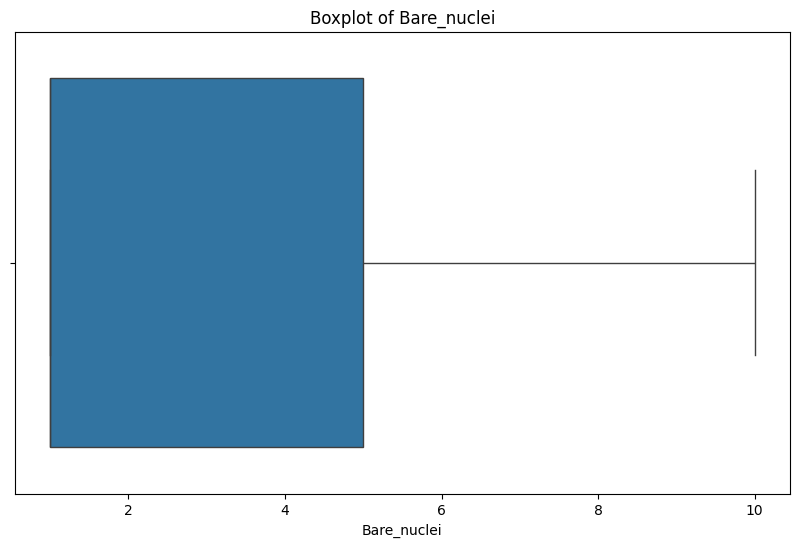

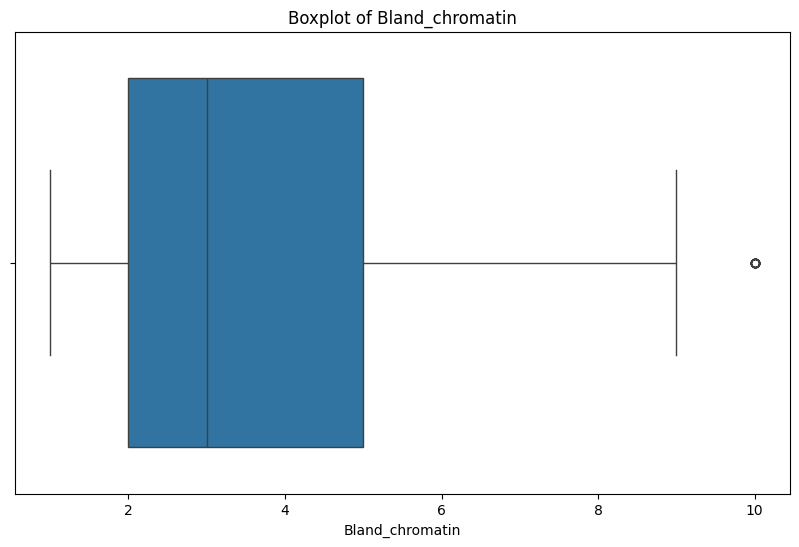

Outliers pada Bland_chromatin sudah dihandel.


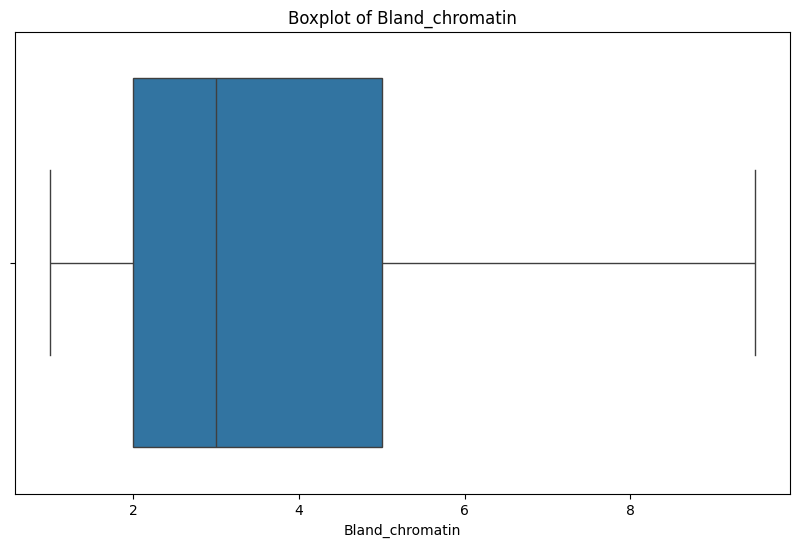

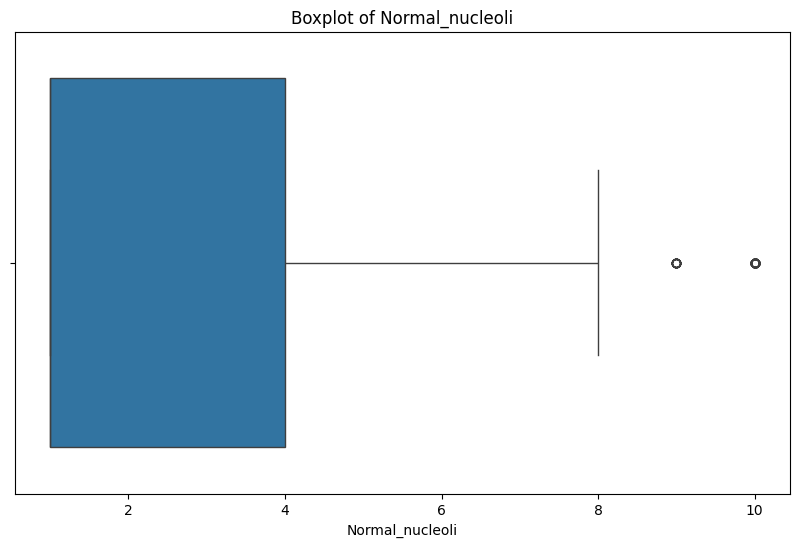

Outliers pada Normal_nucleoli sudah dihandel.


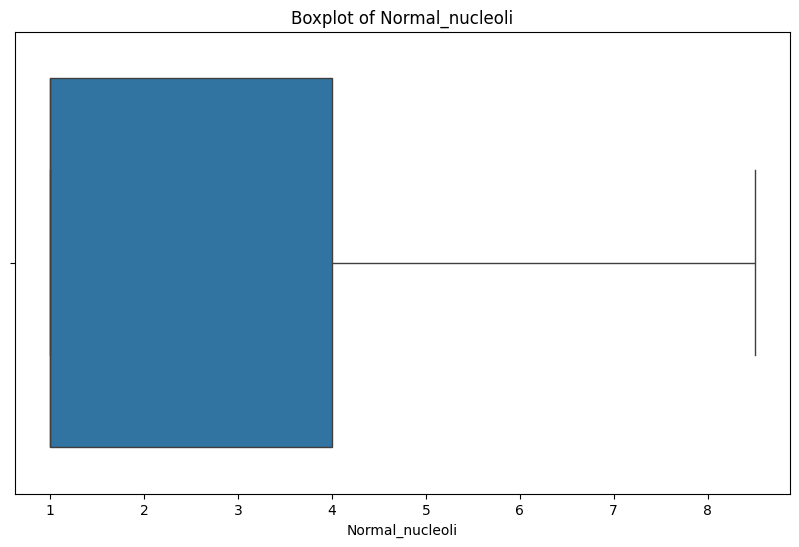

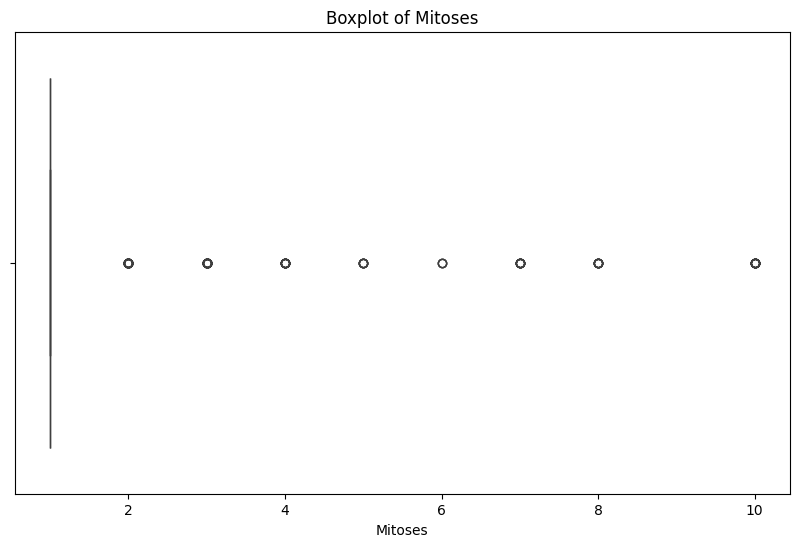

Outliers pada Mitoses sudah dihandel.


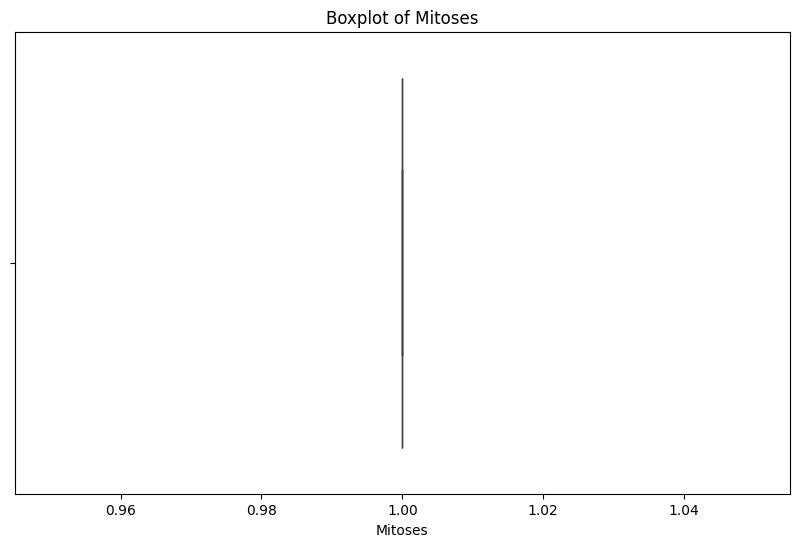

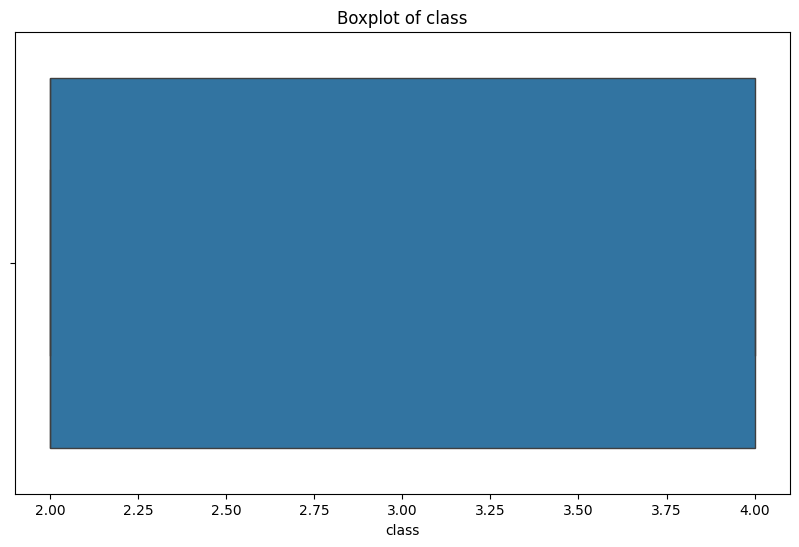

Outliers pada class sudah dihandel.


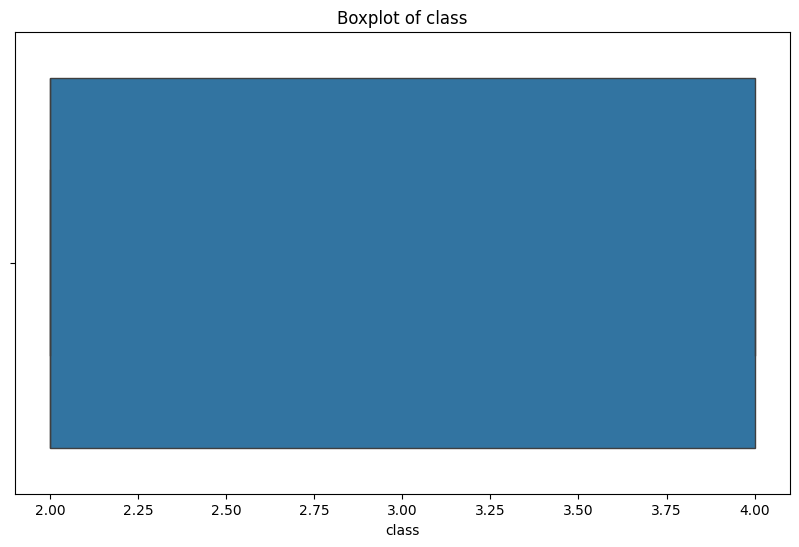

In [155]:
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Contoh untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plot_boxplot(df, column)

    # Menangani outlier dengan IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))

    print(f"Outliers pada {column} sudah dihandel.")
    plot_boxplot(df, column)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    float64
 1   Uniformity_of_cell_size      699 non-null    float64
 2   Uniformity_of_cell_shape     699 non-null    float64
 3   Marginal_adhesion            699 non-null    float64
 4   Single_epithelial_cell_size  699 non-null    float64
 5   Bare_nuclei                  699 non-null    float64
 6   Bland_chromatin              699 non-null    float64
 7   Normal_nucleoli              699 non-null    float64
 8   Mitoses                      699 non-null    float64
 9   class                        699 non-null    float64
dtypes: float64(10)
memory usage: 60.1 KB


**PERIKSA DUPLIKAT**

In [157]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 248
Jumlah baris setelah menghapus duplikat: 451


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              451 non-null    float64
 1   Uniformity_of_cell_size      451 non-null    float64
 2   Uniformity_of_cell_shape     451 non-null    float64
 3   Marginal_adhesion            451 non-null    float64
 4   Single_epithelial_cell_size  451 non-null    float64
 5   Bare_nuclei                  451 non-null    float64
 6   Bland_chromatin              451 non-null    float64
 7   Normal_nucleoli              451 non-null    float64
 8   Mitoses                      451 non-null    float64
 9   class                        451 non-null    float64
dtypes: float64(10)
memory usage: 38.8 KB


In [159]:
df.head()

Clump_thickness  Uniformity_of_cell_size  \
Sample_code_number                                             
1000025                         5.0                      1.0   
1002945                         5.0                      4.0   
1015425                         3.0                      1.0   
1016277                         6.0                      8.0   
1017023                         4.0                      1.0   

                    Uniformity_of_cell_shape  Marginal_adhesion  \
Sample_code_number                                                
1000025                                  1.0                1.0   
1002945                                  4.0                5.0   
1015425                                  1.0                1.0   
1016277                                  8.0                1.0   
1017023                                  1.0                3.0   

                    Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  \
Sample_code_number                                                              
1000025                                     2.0          1.0              3.0   
1002945                                     7.0         10.0              3.0   
1015425                                     2.0          2.0              3.0   
1016277                                     3.0          4.0              3.0   
1017023                                     2.0          1.0              3.0   

                    Normal_nucleoli  Mitoses  class  
Sample_code_number                                   
1000025                         1.0      1.0    2.0  
1002945                         2.0      1.0    2.0  
1015425                         1.0      1.0    2.0  
1016277                         7.0      1.0    2.0  
1017023                         1.0      1.0    2.0

**VALIDASI TIPE DUPLIKAT**

In [160]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai nom-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
  non_numeric_values = df[pd.to_numeric(df[column], errors='coerce').isna()]
  if len(non_numeric_values) > 0:
    print(f"\nNilai non-numerik dalam kolom {column}:")
    print(non_numeric_values[column].unique())

Clump_thickness                float64
Uniformity_of_cell_size        float64
Uniformity_of_cell_shape       float64
Marginal_adhesion              float64
Single_epithelial_cell_size    float64
Bare_nuclei                    float64
Bland_chromatin                float64
Normal_nucleoli                float64
Mitoses                        float64
class                          float64
dtype: object


**DATA CLEANING**

In [161]:
#Cek missing value
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

#Menangani missing values
for column in df.columns:
  if df[column].dtype == 'object':
    #Untuk kolom kategorical,   isi dengan modus
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    #Untuk kolom numerik, isi dengan median
    df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
class                          0
dtype: int64

Missing values setelah pembersihan:
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
class                          0
dtype: int64


/tmp/ipython-input-161-2535874059.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [162]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/adult_class_cleaned.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'adult_class_cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'adult_class_cleaned.csv'


**Mengkontruksi Data**

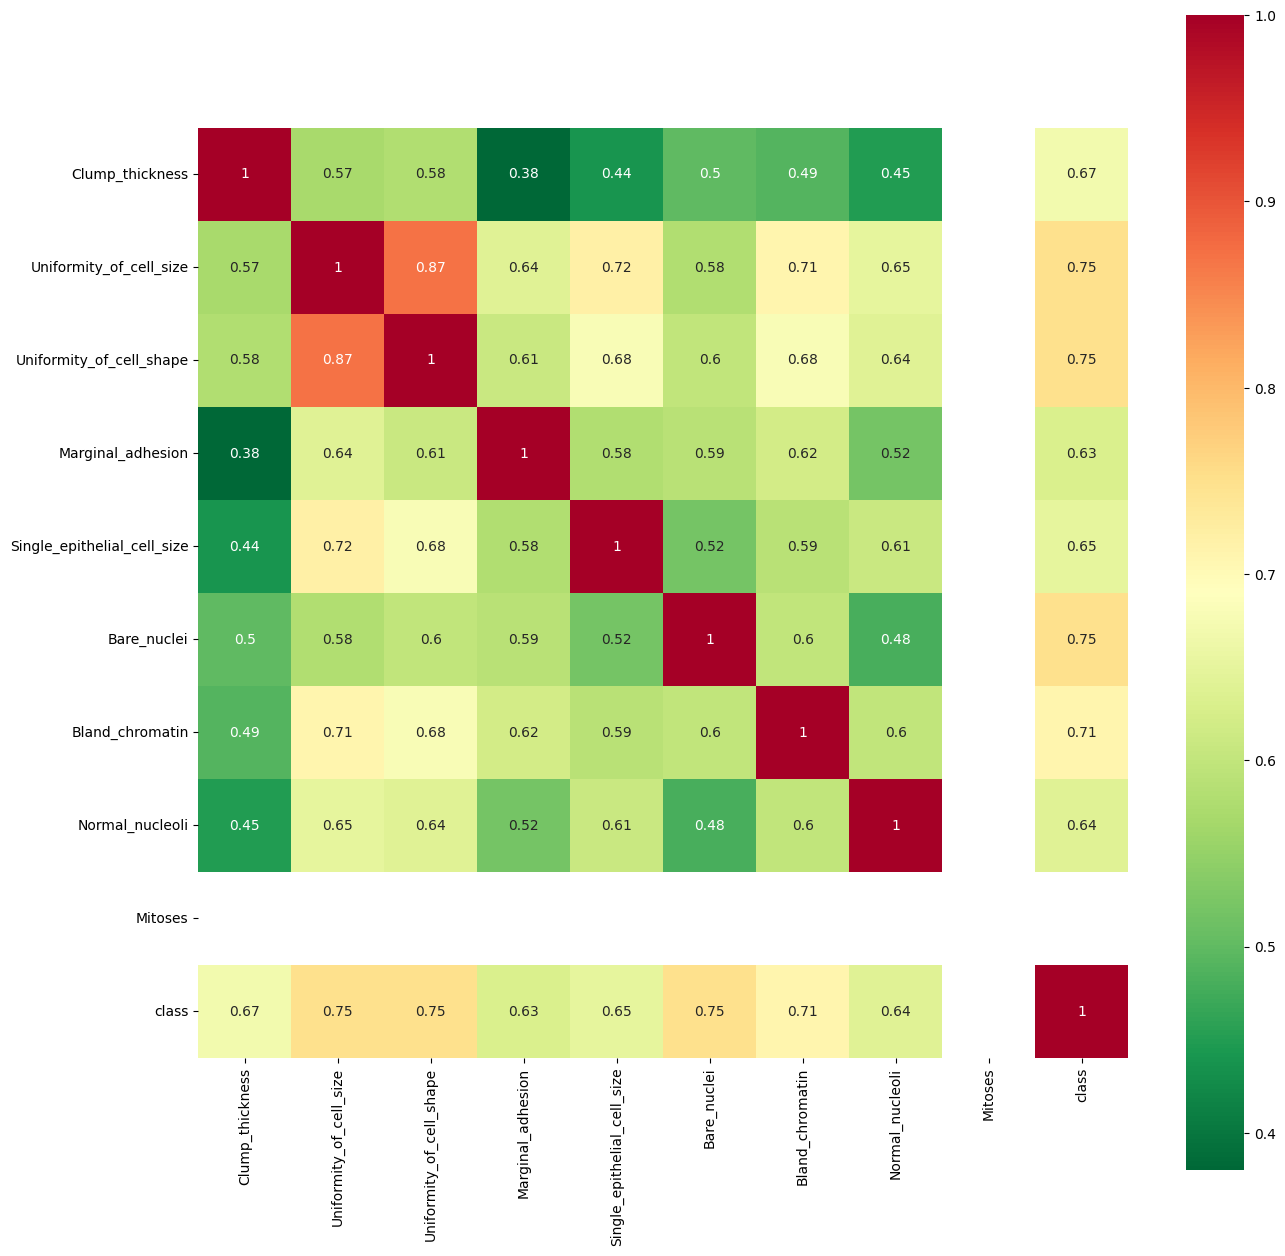

In [163]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [164]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [165]:
df

Clump_thickness  Uniformity_of_cell_size  \
Sample_code_number                                             
1000025                         5.0                      1.0   
1002945                         5.0                      4.0   
1015425                         3.0                      1.0   
1016277                         6.0                      8.0   
1017023                         4.0                      1.0   
...                             ...                      ...   
695091                          5.0                     10.0   
776715                          3.0                      1.0   
888820                          5.0                     10.0   
897471                          4.0                      8.0   
897471                          4.0                      8.0   

                    Uniformity_of_cell_shape  Marginal_adhesion  \
Sample_code_number                                                
1000025                                  1.0                1.0   
1002945                                  4.0                5.0   
1015425                                  1.0                1.0   
1016277                                  8.0                1.0   
1017023                                  1.0                3.0   
...                                      ...                ...   
695091                                  10.0                5.0   
776715                                   1.0                1.0   
888820                                  10.0                3.0   
897471                                   6.0                4.0   
897471                                   8.0                5.0   

                    Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  \
Sample_code_number                                                              
1000025                                     2.0          1.0              3.0   
1002945                                     7.0         10.0              3.0   
1015425                                     2.0          2.0              3.0   
1016277                                     3.0          4.0              3.0   
1017023                                     2.0          1.0              3.0   
...                                         ...          ...              ...   
695091                                      4.0          5.0              4.0   
776715                                      3.0          2.0              1.0   
888820                                      7.0          3.0              8.0   
897471                                      3.0          4.0              9.5   
897471                                      4.0          5.0              9.5   

                    Normal_nucleoli  class  
Sample_code_number                          
1000025                         1.0    2.0  
1002945                         2.0    2.0  
1015425                         1.0    2.0  
1016277                         7.0    2.0  
1017023                         1.0    2.0  
...                             ...    ...  
695091                          4.0    4.0  
776715                          1.0    2.0  
888820                          8.5    4.0  
897471                          6.0    4.0  
897471                          4.0    4.0  

[451 rows x 9 columns]

In [166]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [167]:
data_tanpa_fitur = df.drop('class', axis=1)

In [168]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop('class', axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

In [170]:
# Evaluasi
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.9340659340659341
Precision: 0.9340659340659341
Recall: 0.9340659340659341

Classification Report:
              precision    recall  f1-score   support

         2.0       0.95      0.91      0.93        43
         4.0       0.92      0.96      0.94        48

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



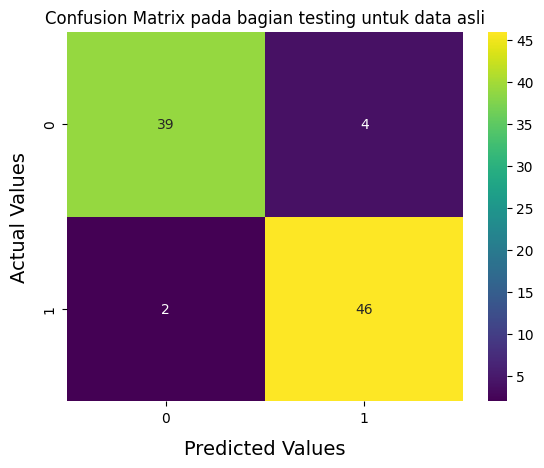

In [171]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

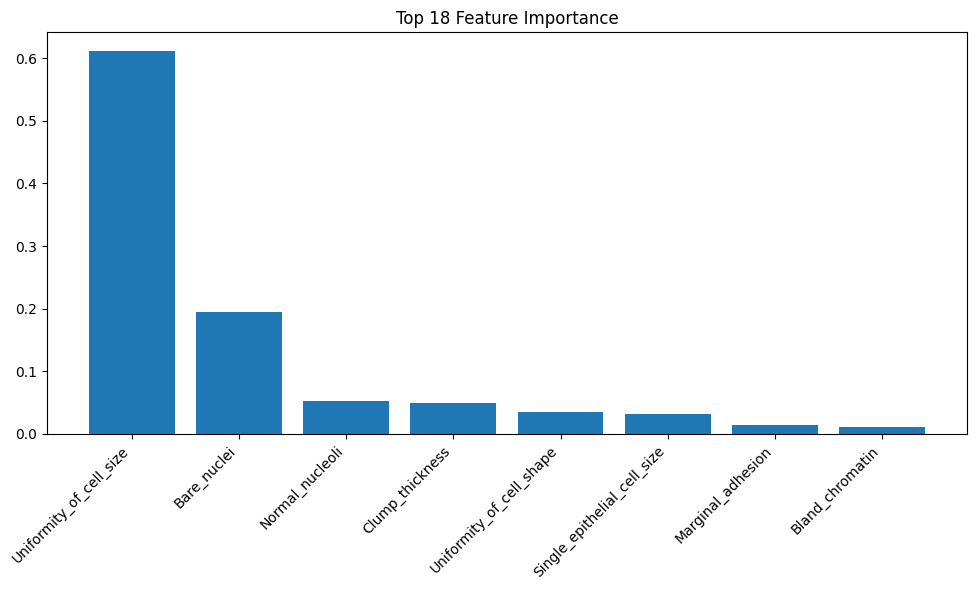

In [172]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [173]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9166666666666666


In [174]:
# Evaluasi model terbaik
print("\nBest Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 0.9340659340659341
Precision: 0.9340659340659341
Recall: 0.9340659340659341

Classification Report:
              precision    recall  f1-score   support

         2.0       0.95      0.91      0.93        43
         4.0       0.92      0.96      0.94        48

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



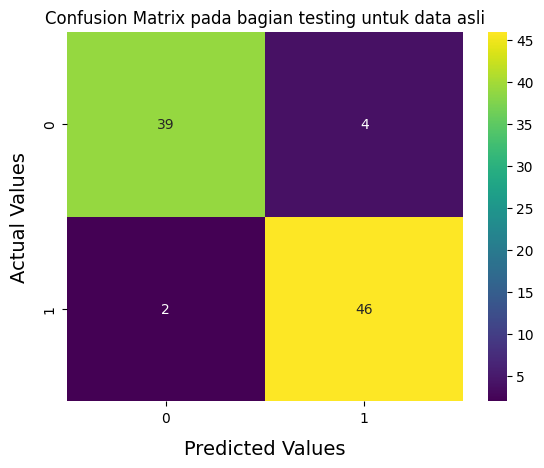

In [175]:
sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

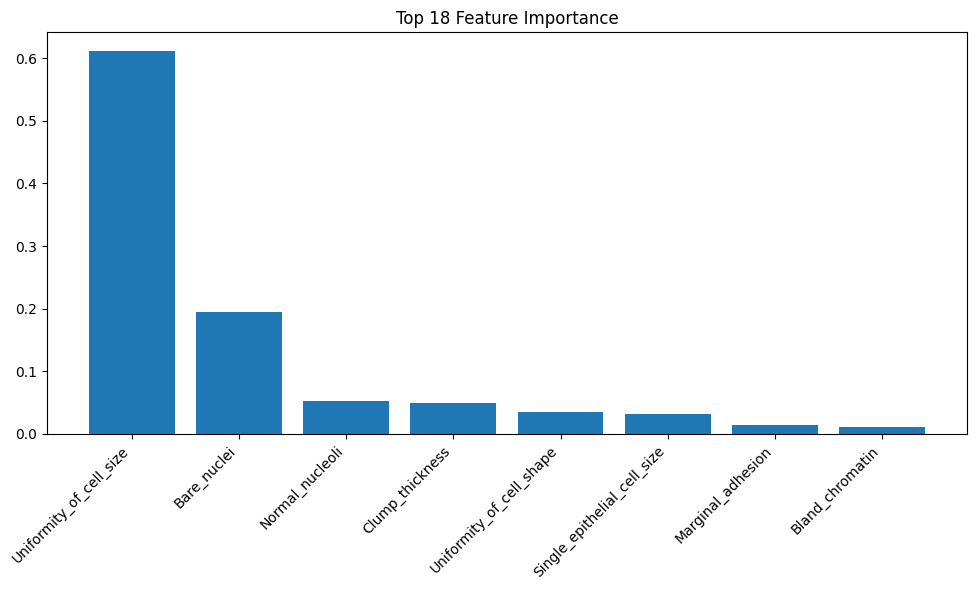

In [176]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [177]:
import joblib

# Simpan model terbaik
joblib.dump(best_dt_model, f'{folder_name}/best_class_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_class_predictor_model.joblib'")

Model terbaik telah disimpan sebagai 'best_class_predictor_model.joblib'


In [178]:
from sklearn.metrics import accuracy_score

# Untuk model Decision Tree terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9340659340659341


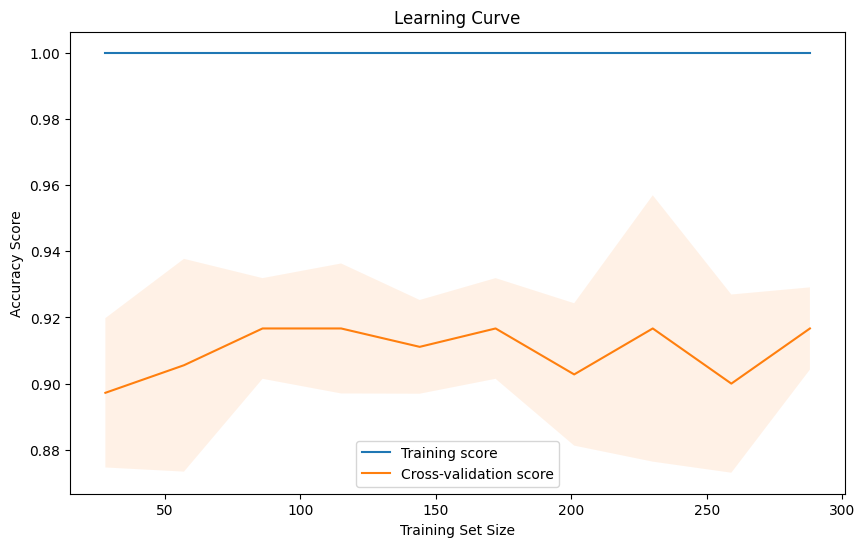

In [179]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [180]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV score:", np.std(cv_scores))

Cross-validation scores: [0.93055556 0.91666667 0.93055556 0.90277778 0.90277778]
Mean CV score: 0.9166666666666666
Standard deviation of CV score: 0.012422599874998838


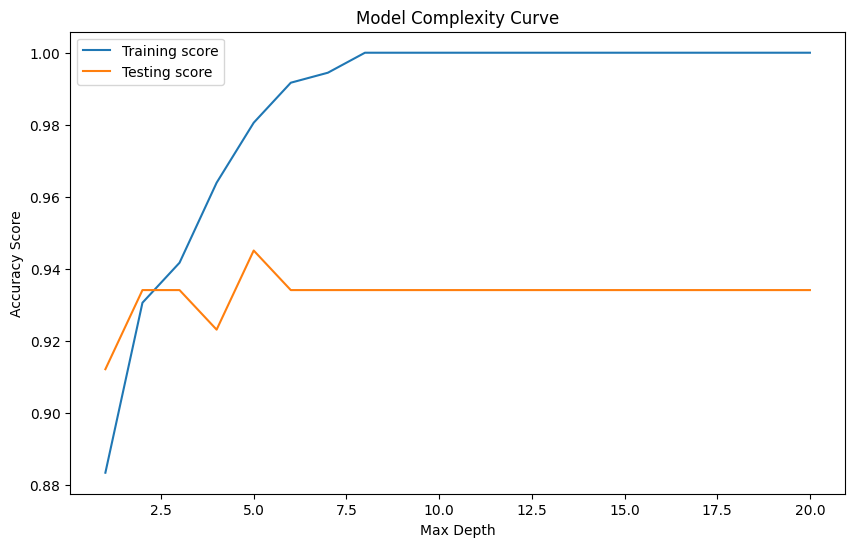

In [181]:
max_depths = range(1, 21)  #digunakan untuk nilai integer dari 1 sampai 20
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10,6))
plt.plot(max_depths, train_scores, label='Training score')
plt.plot(max_depths, test_scores, label='Testing score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity Curve')
plt.legend()
plt.show()

In [182]:
from sklearn.tree import plot_tree

In [ ]:
# Buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(dt_model, feature_names=X.columns, class_names=['2', '4'],
          filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'")

In [ ]:
# Buat gambar dengan ukuran yang sangat besar
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib # assuming joblib is needed for loading the model if not already loaded

plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
# Note: best_dt_model and X should be defined in previous cells.
# Ensure these variables are available in the current environment.
# If you restarted the kernel, you might need to re-run the cells that define them.
plot_tree(best_dt_model, feature_names=X.columns, class_names=['2', '4'],
          filled=True, rounded=True, fontsize=10)

# Simpan gambar dengan DPI tinggi
# Note: folder_name should be defined in a previous cell.
# Ensure this variable is available in the current environment.
plt.savefig(f'{folder_name}/best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'")

**UNIT 7**
**UNIT 7**

In [ ]:
# Load the uploaded notebook
#notebook_path = "/mnt/data/prediktor_kanker_payudara.ipynb" # Original incorrect path
notebook_path = f"{folder_name}/prediktor_kanker_payudara.ipynb" # Corrected path using the folder_name variable
with open(notebook_path, "r", encoding="utf-8") as f:
    notebook = read(f, as_version=4)

In [ ]:
new_code = '''
# 7. Model: Decision Tree + Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
'''
# The following block was incorrectly indented and is removed:
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [5, 10, 15, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
# }

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [ ]:
# 8. Evaluasi Model
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("\\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label=4.0):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label=4.0):.5f}")

In [ ]:
# 9. Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', title="Feature Importance")
plt.show()

In [ ]:
# 10. Visualisasi Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

In [ ]:
# 11. Prediksi Data Baru
new_data_dict = {
    'Clump_thickness': 3,
    'Uniformity_of_cell_size': 2,
    'Uniformity_of_cell_shape': 3,
    'Marginal_adhesion': 3,
    'Single_epithelial_cell_size': 1,
    'Bare_nuclei': 3,
    'Bland_chromatin': 4,
    'Normal_nucleoli': 2,
    'Mitoses': 4 # Keep Mitoses for now, but we'll build the DataFrame with the correct columns from X
}

# Create a list of columns from the training data X
# Ensure X is available in the environment from previous cells
training_columns = X.columns.tolist()

# Create the new_data DataFrame using the columns from X
# This ensures the columns and their order match the training data
# Any features in new_data_dict not in training_columns will be dropped
# Any features in training_columns not in new_data_dict will be added with NaN (or 0, if fillna is used) -
# in this case, we want to make sure all features in training_columns are in new_data_dict.
# We will manually ensure all features in X are in new_data_dict.

# Let's check if 'Mitoses' is actually in X after the preprocessing steps
print(f"'Mitoses' in training features X: {'Mitoses' in training_columns}")

# If 'Mitoses' was indeed removed from X during preprocessing,
# you have two options:
# 1. Re-run the preprocessing steps and feature selection, ensuring 'Mitoses' is kept in X if it's important.
# 2. Remove 'Mitoses' from the new_data_dict if it was intentionally removed from X during training.

# Assuming 'Mitoses' *was* removed from X and you want to predict on the features the model was trained on:
# Let's create the new_data DataFrame with only the columns present in X
new_data_values = {k: [v] for k, v in new_data_dict.items()}
# Create the DataFrame and select only the columns that are in X
new_data = pd.DataFrame(new_data_values)[training_columns]

# If 'Mitoses' was *not* removed from X and is still in training_columns, the above will work directly.
# If 'Mitoses' *was* removed from X, the above code will create new_data without 'Mitoses'.

# Make sure new_data has the exact same columns as X and in the same order
new_data = new_data[X.columns]


prediction = best_model.predict(new_data)
print("\nPrediksi untuk data baru:", prediction[0])

In [ ]:
# Add the new code cell to the notebook
from nbformat.v4 import new_code_cell
notebook.cells.append(new_code_cell(new_code))

In [ ]:
# Save the updated notebook
#updated_path = "/mnt/data/prediktor_kanker_payudara_updated.ipynb" # Original incorrect path
updated_path = f"{folder_name}/prediktor_kanker_payudara_updated.ipynb" # Corrected path using the folder_name variable
with open(updated_path, "w", encoding="utf-8") as f:
    write(notebook, f)

print(f"Updated notebook saved to: {updated_path}")

In [ ]:
# 1. Cek Overfitting/Underfitting

# Initialize the list to hold additional code cells
additional_cells = []

additional_cells.append(new_code_cell('''
# 1. Overfitting vs Underfitting
train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
'''))

In [ ]:
# 2. Learning Curve
additional_cells.append(new_code_cell('''
# 2. Learning Curve (max_depth vs accuracy)
train_scores = []
test_scores = []
depth_range = range(1, 21)

for d in depth_range:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(depth_range, train_scores, label='Train Accuracy')
plt.plot(depth_range, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Complexity)')
plt.legend()
plt.grid(True)
plt.show()
'''))

In [ ]:
# 3. Cross-Validation Score
additional_cells.append(new_code_cell('''
# 3. Cross-Validation Score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
'''))

In [ ]:
# 4. Beberapa Kombinasi Split
additional_cells.append(new_code_cell('''
# 4. Performa Berbagai Split Data
split_ratios = [0.2, 0.3, 0.4]
for ratio in split_ratios:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=ratio, random_state=42)
    model = DecisionTreeClassifier(**grid.best_params_, random_state=42)
    model.fit(X_train_split, y_train_split)
    acc = model.score(X_test_split, y_test_split)
    print(f"Test Size {int(ratio*100)}% - Accuracy: {acc:.4f}")
'''))

In [ ]:
# 5. Evaluasi Tanpa Menghapus Outlier (tanpa ubah Bare_nuclei '?')
additional_cells.append(new_code_cell('''
# 5. Evaluasi Tanpa Menghapus Outlier (Tanpa ubah '?')
data_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", names=columns)
data_raw = data_raw.drop("ID", axis=1)
data_raw = data_raw.replace('?', np.nan)
data_raw = data_raw.dropna()

data_raw['Bare_nuclei'] = data_raw['Bare_nuclei'].astype(float)
data_raw['Class'] = data_raw['Class'].replace({2: 'Benign', 4: 'Malignant'})

X_raw = data_raw.drop("Class", axis=1)
y_raw = data_raw["Class"]

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.1, random_state=42)

model_raw = DecisionTreeClassifier(**grid.best_params_, random_state=42)
model_raw.fit(X_train_raw, y_train_raw)
acc_raw = model_raw.score(X_test_raw, y_test_raw)

print(f"Akurasi tanpa menghapus outlier (tanpa imputasi): {acc_raw:.4f}")
'''))

In [ ]:
# 6. Simpan Model Terbaik
additional_cells.append(new_code_cell('''
Simpan Model Terbaik
import joblib

joblib.dump(best_model, "model_decision_tree_breast_cancer.pkl")
print("Model berhasil disimpan ke 'model_decision_tree_breast_cancer.pkl'")
'''))

In [ ]:
# Append all new cells
notebook.cells.extend(additional_cells)

In [ ]:
# Save notebook with new updates
# final_path = "/mnt/data/prediktor_kanker_payudara_final.ipynb" # Original incorrect path
final_path = f"{folder_name}/prediktor_kanker_payudara_final.ipynb" # Corrected path using the folder_name variable
with open(final_path, "w", encoding="utf-8") as f:
    write(notebook, f)

print(f"Updated notebook saved to: {final_path}")

In [ ]:
# Mengimpor Dataset Breast Cancer dan Membersihkan Data
# Dataset memiliki kolom 'Bare_nuclei' yang berisi tanda tanya '?' sebagai missing value

# Unduh data dari UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columns = ["ID", "Clump_thickness", "Uniformity_of_cell_size", "Uniformity_of_cell_shape",
           "Marginal_adhesion", "Single_epithelial_cell_size", "Bare_nuclei", "Bland_chromatin",
           "Normal_nucleoli", "Mitoses", "Class"]

data = pd.read_csv(url, names=columns)

In [ ]:
# Mengimpor Dataset Breast Cancer dan Membersihkan Data
# Dataset memiliki kolom 'Bare_nuclei' yang berisi tanda tanya '?' sebagai missing value

# Unduh data dari UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columns = ["ID", "Clump_thickness", "Uniformity_of_cell_size", "Uniformity_of_cell_shape",
           "Marginal_adhesion", "Single_epithelial_cell_size", "Bare_nuclei", "Bland_chromatin",
           "Normal_nucleoli", "Mitoses", "Class"]

data = pd.read_csv(url, names=columns)

# Ganti '?' pada kolom Bare_nuclei menjadi NaN
# The original line incorrectly tried to replace the column name string 'Bare_nuclei'
# with np.nan across the entire DataFrame.
# The corrected line replaces the specific value '?' with np.nan.
data.replace('?', np.nan, inplace=True)

# Ubah kolom Bare_nuclei ke tipe numerik
# Now that '?' is replaced by NaN, the column can be converted to float
data['Bare_nuclei'] = data['Bare_nuclei'].astype(float)

In [ ]:
# Isi nilai NaN dengan median
data['Bare_nuclei'].fillna(data['Bare_nuclei'].median(), inplace=True)

In [ ]:
# Hapus kolom ID karena tidak berguna untuk analisis
# Menggunakan errors='ignore' agar tidak error jika kolom ID sudah tidak ada
data.drop('ID', axis=1, inplace=True, errors='ignore')

In [ ]:
# Labeling: ubah nilai 2 → 'Benign', dan 4 → 'Malignant'
data['Class'] = data['Class'].replace({2: 'Benign', 4: 'Malignant'})

In [ ]:

# 7. Model: Decision Tree + Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
